In [69]:
import tsplib95
import numpy as np
import random
from math import exp
import networkx as nx
from matplotlib import pyplot as plt

### **<u>Demonstration of TSPLIB 95</u>**
Reference: [Official documnetation](https://tsplib95.readthedocs.io/en/stable/) of TSPLIB 95

**Loading Problem:**

In [51]:
problem1 = tsplib95.load("Data/xqf131.tsp")

**To get the nodes:**

In [52]:
print(list(problem1.get_nodes()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


**Number of nodes present in the problem:**

In [53]:
len(list(problem1.get_nodes()))

131

**To find the weight of edge b/w any two nodes:**

In [54]:
problem1.get_weight(2,4)

13

End of TSPLIB demonstration

#### **<u>Coding Utility Function for Our SA Algorithm</u>**

In [70]:
def tour_cost(path, problem):
    dis = 0
    n = len(path)
    for i in range(n-1):
        dis += problem.get_weight(path[i],path[i+1])
    dis += problem.get_weight(path[n-1],path[0])
    return dis

#### *Hidden Intentionally*

In [71]:
intermediate_costs =[] # y-axis
x=0 # counter for number of actual iterations happened
intermediate_tempr = []

#### **<u>Simulated Annealing</u>**

Pass initial random path, the tsp problem, initial temperature and max iterations as argument. <br>
Final path is returned in the output.

In [72]:
def SA(initial_path, problem, Tm = 1000, iter_max = 10000,cooling_factor=0.999):
    path = initial_path.copy()
    cost = tour_cost(path,problem=problem) 

    global intermediate_costs
    intermediate_costs.append(cost)
    global intermediate_tempr
    intermediate_tempr.append(Tm)

    n = len(initial_path)
    for i in range(1,iter_max):
        two_indices = random.sample(range(1,n),2)
        next_path = path.copy()

        # reverse sublist (neighbour)
        next_path[two_indices[0]:two_indices[1]+1] = next_path[two_indices[0]:two_indices[1]+1][::-1] 

        next_cost = tour_cost(next_path,problem=problem)
        dE = cost - next_cost # delta Energy

        T = Tm*(cooling_factor**i) # performing better
        # T = Tm*(cooling_factor/i)

        if(T==1e-6):
            break
        try:
            pb = 1/(1+exp(-dE/T))
        except: 
            continue
        if dE > 0:
            path = next_path.copy()
        else:
            if  random.random() < pb:
                path = next_path.copy()
        cost = tour_cost(path,problem=problem)

        intermediate_costs.append(next_cost)
        intermediate_tempr.append(T)
        global x
        x += 1

    final_cost = cost
    final_path = path.copy()
    return final_path

##### **<u>Created Utility Function Here for Graphical Analysis</u>**

In [74]:
def graphical_analysis(argument,problem,init_path, dataPointsCount):
    global intermediate_costs
    match argument:
        case 1: # CF vs final_cost
            cooling_factors = [0.111, 0.222, 0.333, 0.444, 0.555, 0.666, 0.777, 0.888, 0.999]
            cooling_factors_str = ["0.111", "0.222", "0.333", "0.444", "0.555", "0.666", "0.777", "0.888", "0.999"]
            final_costs = []
            for i in range(len(cooling_factors)):
                final_path_ = SA(initial_path=init_path,problem=problem,cooling_factor=cooling_factors[i])
                final_cost_ = tour_cost(final_path_,problem)
                final_costs.append(final_cost_)
            plt.bar(cooling_factors_str,final_costs)
            plt.title("VLSI Dataset "+"("+str(dataPointsCount)+" data points)")
            plt.xlabel("Cooling factor")
            plt.ylabel("Final cost")
            plt.show()
        case 2: # iterations vs intermediate_costs
            intermediate_costs = []
            global x
            x = 0
            SA(initial_path=init_path,problem=problem)
            plt.plot(range(x+1),intermediate_costs)
            plt.title("VLSI Dataset "+"("+str(dataPointsCount)+" data points)")
            plt.xlabel("Iterations")
            plt.ylabel("Cost")
            plt.show()
        case 3: # Initial tempr vs Final cost
            initial_tempr = range(1,1000, 20)
            final_cost_g3 = []
            for i in range(len(initial_tempr)):
                final_path_g3 = SA(initial_path=init_path,problem=problem,Tm=initial_tempr[i])
                final_cost_g3.append(tour_cost(final_path_g3,problem))
            plt.plot(initial_tempr,final_cost_g3, "go--")
            plt.title("VLSI Dataset "+"("+str(dataPointsCount)+" data points)")
            plt.xlabel("Initial Temperature")
            plt.ylabel("Final Cost")
            plt.show()
        case 4: # intermediate tempr vs intermediate cost
            global intermediate_tempr
            intermediate_tempr = []
            intermediate_costs = []

            SA(initial_path=init_path,problem=problem)
            plt.plot(intermediate_tempr, intermediate_costs)
            plt.title("VLSI Dataset "+"("+str(dataPointsCount)+" data points)")
            plt.xlabel("Temperature")
            plt.ylabel("Cost")
            plt.show()

## Solving VLSI Problems
Data source: https://www.math.uwaterloo.ca/tsp/vlsi/index.html#XQF131

### **<u>Problem 1</u>**
131 points

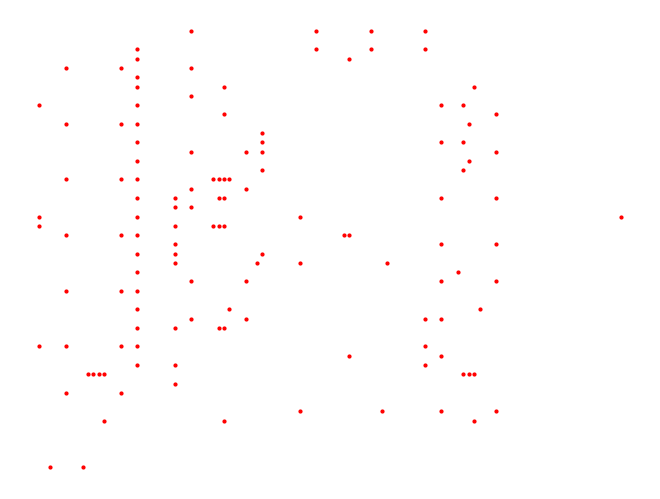

In [75]:
problem1 = tsplib95.load("Data/xqf131.tsp")
nodes1 = list(problem1.get_nodes())
G1 = nx.Graph()
pos1 = {}
for node in nodes1:
    G1.add_node(node)
    x,y = problem1.node_coords[node]
    pos1[node] = (x,y)
nx.draw(G1,pos=pos1, node_size=4, node_color="red")

**Optimal Solution provided by Robert Grant:**

<img src="https://www.math.uwaterloo.ca/tsp/vlsi/xqf131.tour.gif" width=600>

In [76]:
initial_path1 = np.random.permutation(nodes1)
# initial_path1 = list(range(1,132))

In [77]:
final_path1 = SA(initial_path1,problem1,Tm=10000,iter_max=1000000)

In [78]:
initial_cost1 = tour_cost(initial_path1,problem1)
final_cost1 = tour_cost(final_path1,problem1)
print("Initial Cost: ", initial_cost1)
print("Final Cost: ", final_cost1)

Initial Cost:  4319
Final Cost:  646


Solution by our SA: 


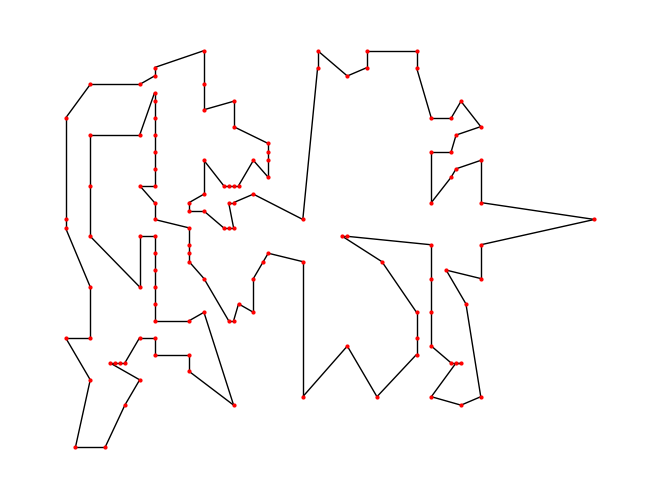

In [79]:
G1 = nx.Graph()
pos1 = {}
for node in nodes1:
    G1.add_node(node)
    x,y = problem1.node_coords[node]
    pos1[node] = (x,y)
    
for i in range(len(final_path1)-1):
    G1.add_edge(final_path1[i],final_path1[i+1])
G1.add_edge(final_path1[len(final_path1)-1],final_path1[0])
print("Solution by our SA: ")
nx.draw(G1,pos=pos1, node_size=4, node_color="red")

#### **<u>Graphical Analysis</u>**

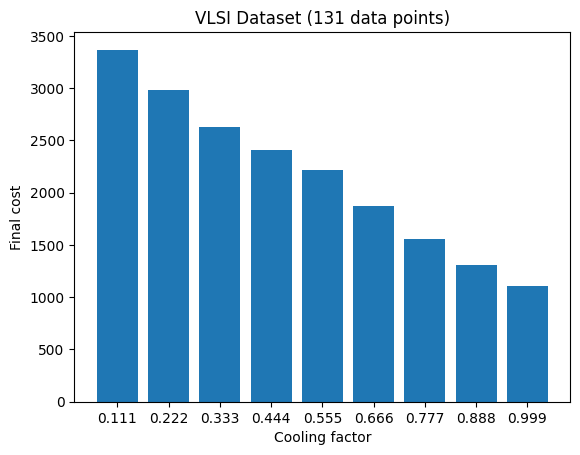

In [323]:
graphical_analysis(1,problem1,initial_path1,131)
# 25.7s

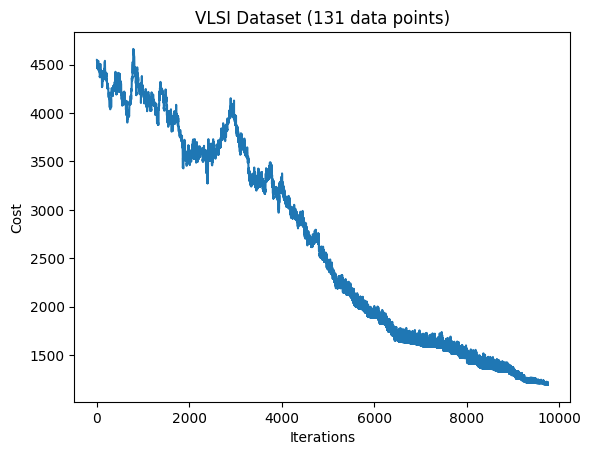

In [324]:
graphical_analysis(2,problem1,initial_path1,131)
# 4.7s

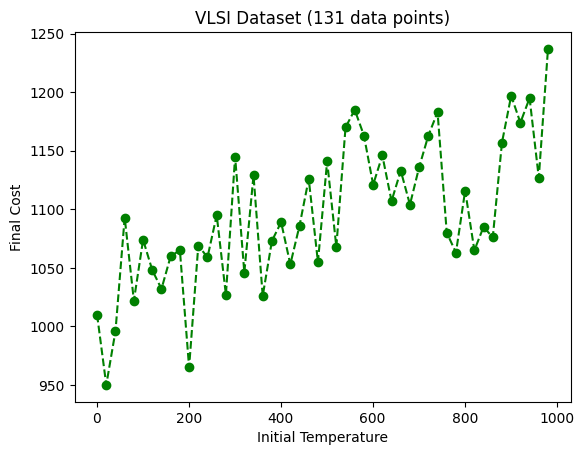

In [325]:
graphical_analysis(3,problem1,initial_path1,131)
# 3m 48.1s

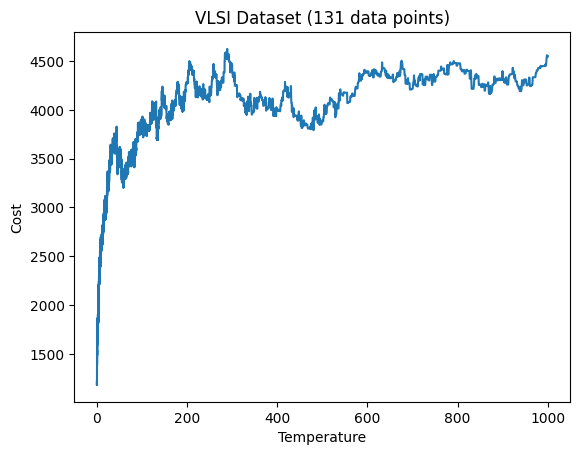

In [326]:
graphical_analysis(4,problem1,initial_path1,131)

### **<u>Problem 2</u>**
237 points

In [32]:
problem2 = tsplib95.load("Data/xqg237.tsp")
nodes2 = list(problem2.get_nodes())

**Optimal Solution provided by Robert Grant:**

<img src="https://www.math.uwaterloo.ca/tsp/vlsi/xqg237.tour.gif" width=600>

In [33]:
initial_path2 = np.random.permutation(nodes2)

In [34]:
final_path2 = SA(initial_path2,problem2,iter_max=1000000)
# 9m 41.9s

In [36]:
initial_cost2 = tour_cost(initial_path2,problem2)
final_cost2 = tour_cost(final_path2,problem2)
print("Initial Cost: ", initial_cost2)
print("Final Cost: ", final_cost2)

Initial Cost:  12313
Final Cost:  1156


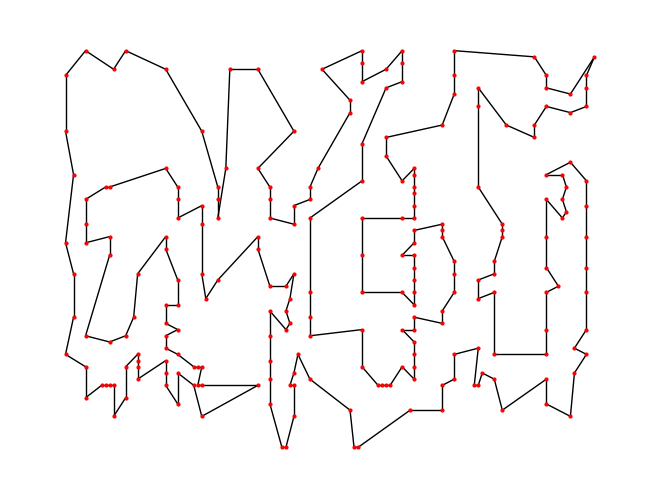

In [37]:
G2 = nx.Graph()
pos2 = {}
for node in nodes2:
    G2.add_node(node)
    x,y = problem2.node_coords[node]
    pos2[node] = (x,y)

for i in range(len(final_path2)-1):
    G2.add_edge(final_path2[i],final_path2[i+1])
G2.add_edge(final_path2[len(final_path2)-1],final_path2[0])
nx.draw(G2,pos=pos2, node_size=4, node_color="red")

### **<u>Problem 3</u>**
343 points

In [38]:
problem3 = tsplib95.load("Data/pma343.tsp")
nodes3 = list(problem3.get_nodes())
# nx.draw(G3,pos=pos3, node_size=4, node_color="red")

**Optimal Solution provided by Robert Grant:**

<img src="https://www.math.uwaterloo.ca/tsp/vlsi/pma343.tour.gif">

In [29]:
initial_path3 = np.random.permutation(nodes3)
final_path3 = SA(initial_path3,problem3,Tm=10000,iter_max=1000000)
# 14 1.4s

In [30]:
initial_cost3 = tour_cost(initial_path3,problem3)
final_cost3 = tour_cost(final_path3,problem3)
print("Initial Cost: ", initial_cost3)
print("Final Cost: ", final_cost3)

Initial Cost:  35897
Final Cost:  1464


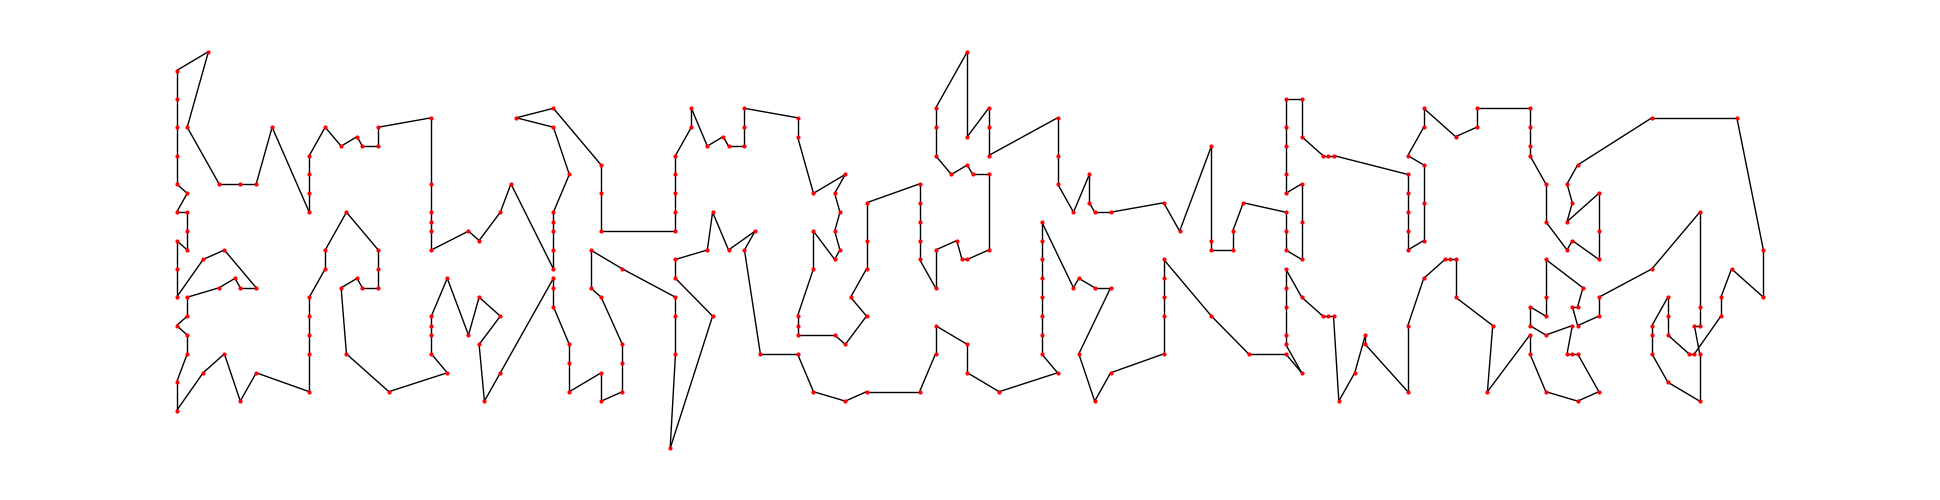

In [31]:
G3 = nx.Graph()
pos3 = {}
for node in nodes3:
    G3.add_node(node)
    x,y = problem3.node_coords[node]
    pos3[node] = (x,y)

for i in range(len(final_path3)-1):
    G3.add_edge(final_path3[i],final_path3[i+1])
G3.add_edge(final_path3[len(final_path3)-1],final_path3[0])
ax3 = plt.axes([0, 2, 3, 1])
nx.draw(G3,pos=pos3, node_size=4, node_color="red", ax=ax3)


### **<u>Problem 4</u>**
379 points

In [39]:
problem4 = tsplib95.load("Data/pka379.tsp")
nodes4 = list(problem4.get_nodes())

**Optimal Solution provided by Robert Grant:**

<img src="https://www.math.uwaterloo.ca/tsp/vlsi/pka379.tour.gif" width=600>

In [44]:
initial_path4 = np.random.permutation(nodes4)
final_path4 = SA(initial_path4,problem4,Tm=10000, iter_max=1000000)
# 15m 41.9s

In [45]:
initial_cost4 = tour_cost(initial_path4,problem4)
final_cost4 = tour_cost(final_path4,problem4)
print("Initial Cost: ", initial_cost4)
print("Final Cost: ", final_cost4)

Initial Cost:  35982
Final Cost:  1518


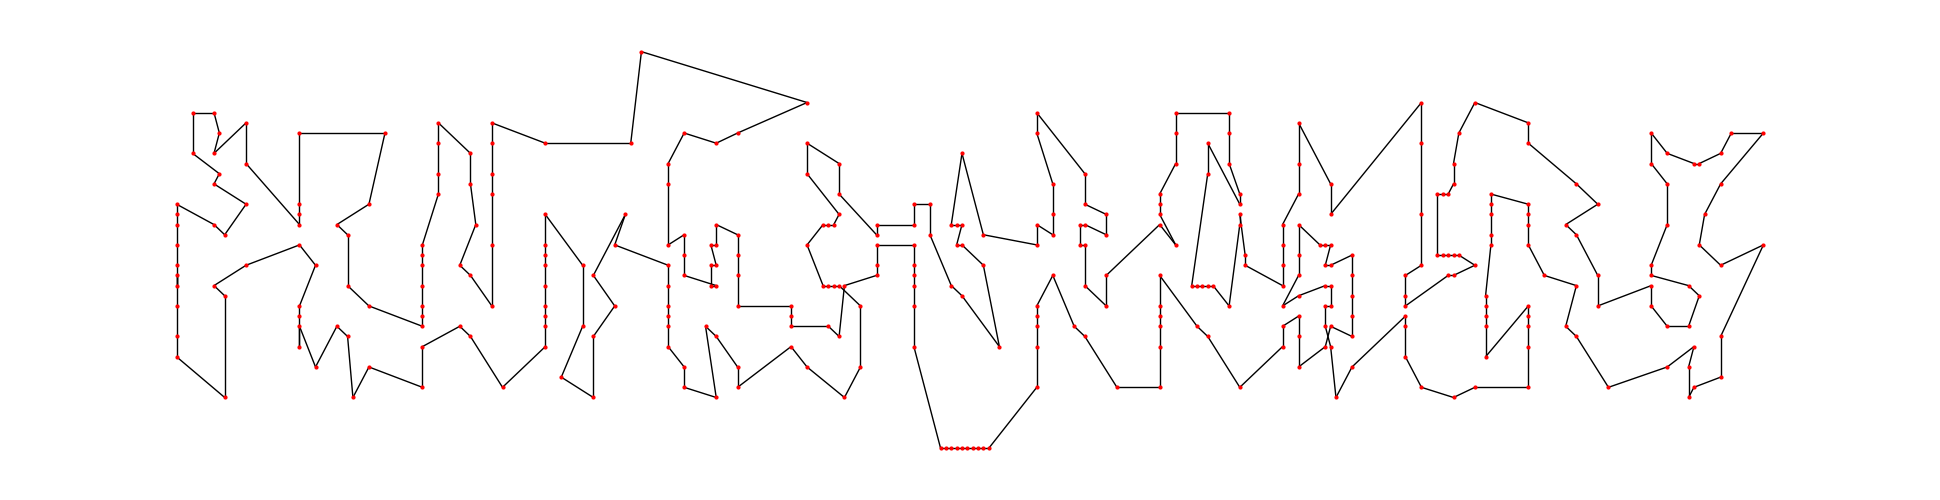

In [46]:
G4 = nx.Graph()
pos4 = {}
for node in nodes4:
    G4.add_node(node)
    x,y = problem4.node_coords[node]
    pos4[node] = (x,y)

for i in range(len(final_path4)-1):
    G4.add_edge(final_path4[i],final_path4[i+1])
G4.add_edge(final_path4[len(final_path4)-1],final_path4[0])
ax4 = plt.axes([0, 2, 3, 1])
nx.draw(G4,pos=pos4, node_size=4, node_color="red", ax=ax4)

### **<u>Problem 5</u>**
380 points

In [47]:
problem5 = tsplib95.load("Data/bcl380.tsp")
nodes5 = list(problem5.get_nodes())

**Optimal Solution provided by Robert Grant:**

<img src="https://www.math.uwaterloo.ca/tsp/vlsi/bcl380.tour.gif" height=390>

In [49]:
initial_path5 = np.random.permutation(nodes5)
final_path5 = SA(initial_path5,problem5,Tm=10000,iter_max=1000000)

In [67]:
initial_cost5 = tour_cost(initial_path5,problem5)
final_cost5 = tour_cost(final_path5,problem5)
print("Initial Cost: ", initial_cost5)
print("Final Cost: ", final_cost5)

Initial Cost:  26605
Final Cost:  1941


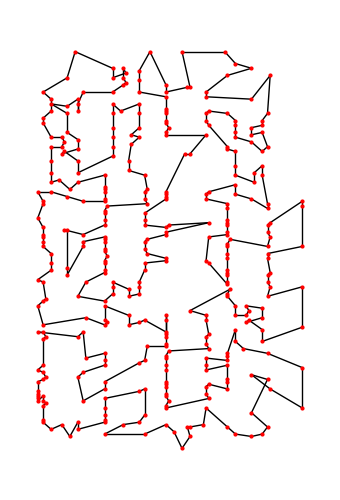

In [68]:
G5 = nx.Graph()
pos5 = {}
for node in nodes5:
    G5.add_node(node)
    x,y = problem5.node_coords[node]
    pos5[node] = (x,y)

for i in range(len(final_path5)-1):
    G5.add_edge(final_path5[i],final_path5[i+1])
G5.add_edge(final_path5[len(final_path5)-1],final_path5[0])
ax5 = plt.axes([0, 2, 0.5, 1])
nx.draw(G5,pos=pos5, node_size=4, node_color="red", ax=ax5)